In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [4]:
X = moons[0]
y = moons[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
tree_clf_3 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tree_clf_6 = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

In [18]:
print(tree_clf.score(X_test, y_test))
print(tree_clf_3.score(X_test, y_test))
print(tree_clf_6.score(X_test, y_test))

0.98
0.92
0.98


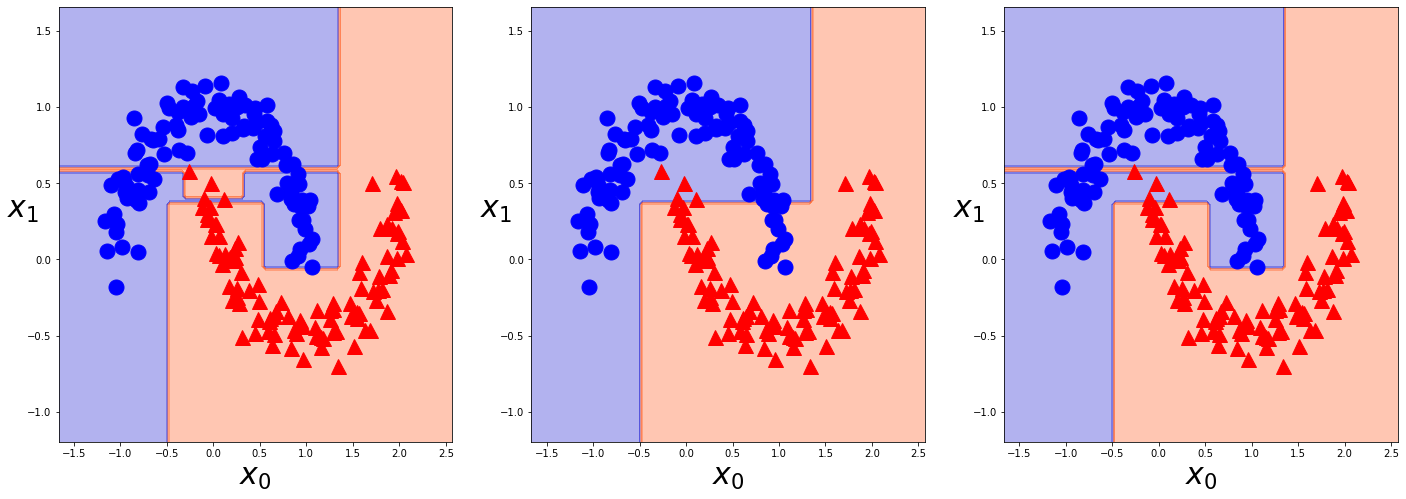

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y):
    _x1 = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    _x2 = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_map = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_map)

def plot_dataset(X, y):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bo', ms=15)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'r^', ms=15)
    plt.xlabel('$x_0$', fontsize=30)
    plt.ylabel('$x_1$', fontsize=30, rotation=0)

plt.figure(figsize=(24, 8))
plt.subplot(131)
plot_decision_boundary(tree_clf, X, y)
plot_dataset(X, y)

plt.subplot(132)
plot_decision_boundary(tree_clf_3, X, y)
plot_dataset(X, y)

plt.subplot(133)
plot_decision_boundary(tree_clf_6, X, y)
plot_dataset(X, y)

plt.show()

In [21]:
import mglearn
from sklearn.tree import DecisionTreeRegressor

reg_X, reg_y = mglearn.datasets.make_wave(n_samples=100)

tree_reg = DecisionTreeRegressor().fit(reg_X, reg_y)
tree_reg_3 = DecisionTreeRegressor(max_depth=3).fit(reg_X, reg_y)
tree_reg_6 = DecisionTreeRegressor(max_depth=6).fit(reg_X, reg_y)

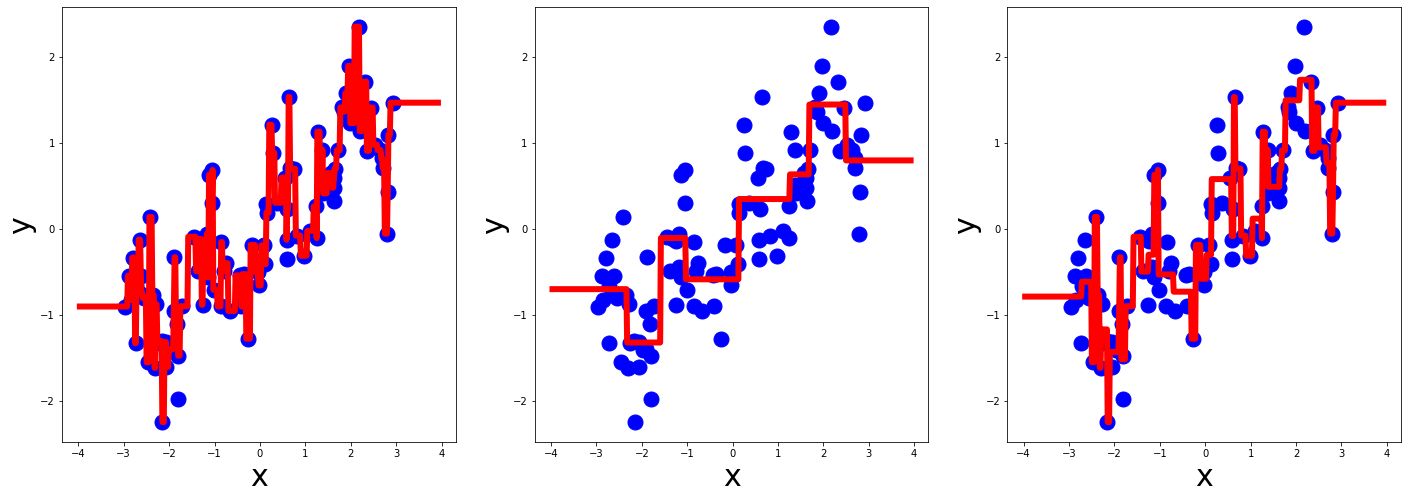

In [26]:
def plot_regression_predictions(tree_reg, X, y):
    x1 = np.linspace(X.min() - 1, X.max() + 1, 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.xlabel('x', fontsize=30)
    plt.ylabel('y', fontsize=30)
    plt.plot(X, y, 'bo', ms=15)
    plt.plot(x1, y_pred, 'r-', linewidth=6)
    
plt.figure(figsize=(24, 8))
plt.subplot(131)
plot_regression_predictions(tree_reg, reg_X, reg_y)

plt.subplot(132)
plot_regression_predictions(tree_reg_3, reg_X, reg_y)

plt.subplot(133)
plot_regression_predictions(tree_reg_6, reg_X, reg_y)

plt.show()